

> Indented block


**Capitol storming 2021 google news & twitter sentiment analysis**
---
**Author**: Felix Meier

**Titel**: Scraping google news and twitter and performing a sentiment analysis of recent capitol storming articles/tweets

**Technical summary**
~1400 recent google news articles and 5000 tweets in regard to the capitol were scraped. Topic modelling was applied using BERTopic. Sentiment analysis is performed using two algorithms, textblob and Vader. Vader performed significantly better than textblob. BERTopic did not accurately predict the result (most likley since 1400 articles are thrown together), but clusters of related topics emerge quite clearly from googlenews. 

**Topic summary**



> *Google News (n=1400):*

Google News articles have a clear and signifcant biased toward negative sentiment, so an overwhelming majority express views that could be interpreted as negative. There does not appear to be particularly strong correlation (0.36)between subjectivity of the article (facts vs opinion in language) and the sentiment outcome. 



> *Twitter (n=50 000):*

Tweets regarding the capitol tend to have sentiment that is more widely distributed with a clear spike in neutral sentiment. This could be attributed to the more diverse range of opinions reflected by Twitters' user base (conservatives, liberals and everything in between) and possibly a lot of bots articulating opinion in a rather neutral sentiment. 


A wordcloud of google news articles regarding 'capitol' :

****
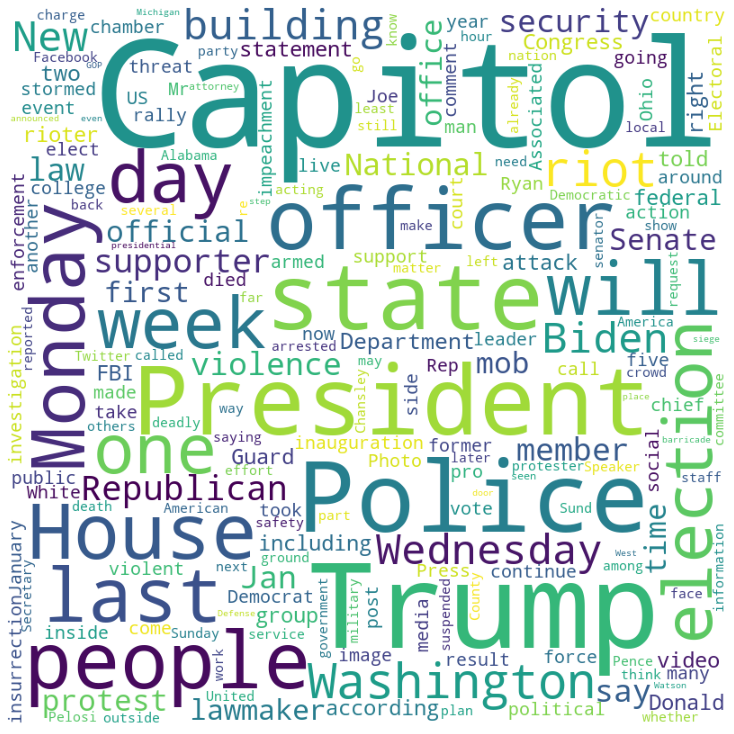

#subjectivity vs sentiment polarity of google news articles regarding 'capitol'search:

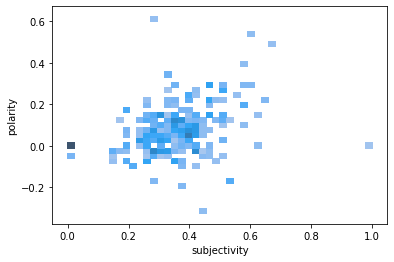

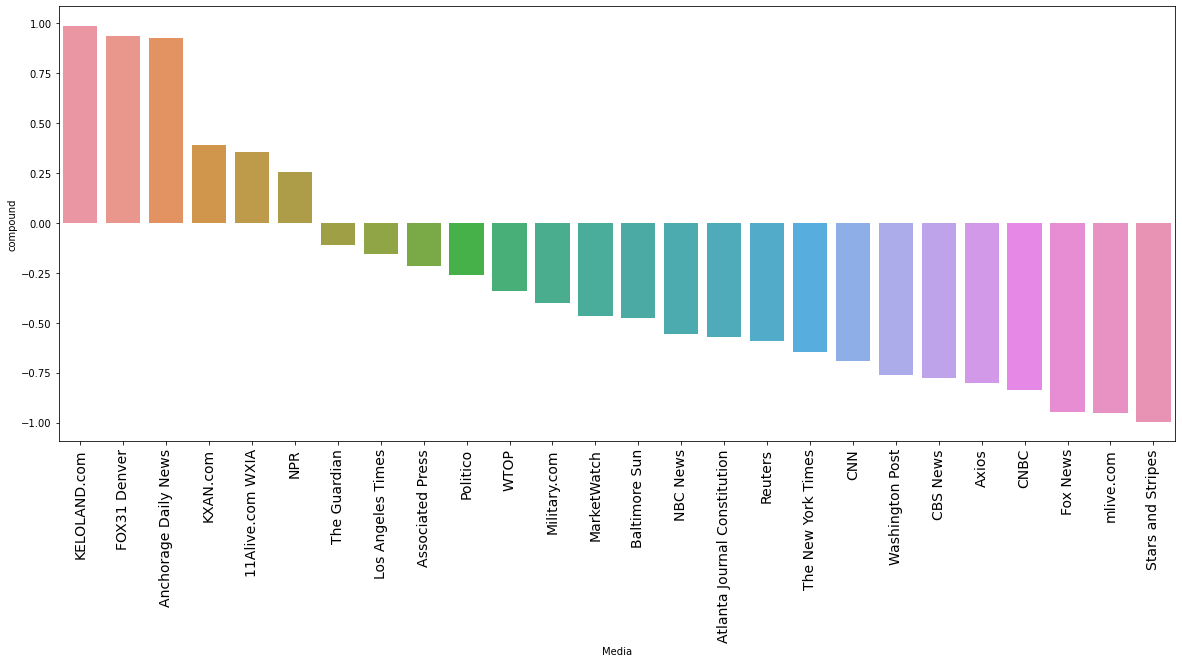

In [ ]:
 #comparing mean sentiment of media outlets that have published at least 10 articles relating to 'capitol', -1 = negative sentiment, +1= postive sentiment
 plt.figure(figsize=(20,8))
 plt.xticks(fontsize=14, rotation=90)
 plt.ylabel("sentiment")
 plt.xlabel("Publication")
 sns.barplot(x="Media", y="compound", data=top_vader)


In [ ]:
# Sentiment analysis of google news articles, -1 = most negative, +1 most positive

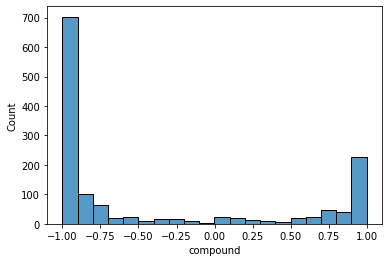

In [ ]:
# Sentiment analysis of tweets, -1 = most negative, +1 most positive

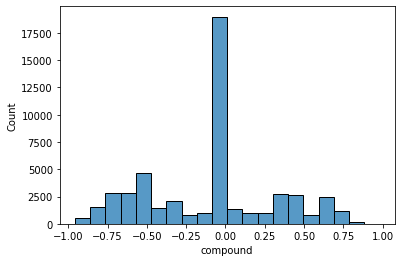

800 0.084


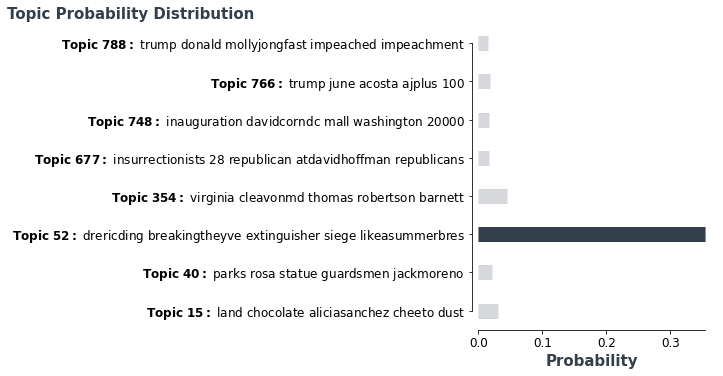

In [ ]:
#Topic Probability Distribution of Tweets

model.visualize_distribution(probabilities[0])

In [ ]:
#topics twitter
model.visualize_topics()

In [ ]:
#############################################################################################################################################################################################################################

In [ ]:
# install libraries
!pip install bertopic
!pip install bertopic[visualization]
!pip install GoogleNews
!pip install newspaper3k
!pip install torch
!pip install spacy
!pip install nltk
!python -m spacy download en_core_web_sm
!pip install vaderSentiment
!pip install requests
!pip install requests-oauthlib
!pip install TwitterAPI
!pip install tweepy
!pip install preprocessor

In [ ]:
#import libraries
import numpy as np
import pandas as pd
from newspaper import Article
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import spacy
from spacy.lang.en import English
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
nltk.download('stopwords')
import os
from TwitterAPI import TwitterAPI
import json
import requests
import tweepy

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#import google news and set language and period for founding date (from Handelsregister) till now
from GoogleNews import GoogleNews
googlenews=GoogleNews(start='09/04/2016')
googlenews = GoogleNews(lang='de')
googlenews.get_news('Cosmonauts & Kings')
result=googlenews.result()
df=pd.DataFrame(result)



In [ ]:
df

title  ...                      site
0  Podcast Handelsblatt Disrupt: Cosmonauts & Kin...  ...              Handelsblatt
1  „Cowboys & Cosmonauts“ von Los Santos - Loblie...  ...       Stuttgarter Zeitung
2                         Porträt von Juri Schnöller  ...   Tagesspiegel Background
3  „Cowboys & Cosmonauts“ von Los Santos: Loblied...  ...   Stuttgarter Nachrichten
4  Cosmonauts & Kings: Wahlkämpfe ins digitale Ze...  ...                      None
5  #WirBleibenZuhause: Jens Spahn ruft Aktion zum...  ...  W&V - Werben & Verkaufen
6                 Cosmonauts: Birth of the Space Age  ...                      None

[7 rows x 8 columns]

In [ ]:
#unfortunatelly, there are not enough articles on Cosmonauts & Kings to do a topic analysis

In [ ]:
#lets clear the search
googlenews.clear()

In [ ]:
#and try investigating the media reception of the recent capitol storming instead

googlenews=GoogleNews(start='01/06/2021')
googlenews = GoogleNews(lang='en')
googlenews = GoogleNews(encode='utf-8')
googlenews.get_news('capitol')
googlenews.results(sort=) 
GoogleNews( )
result=googlenews.result()
df1=pd.DataFrame(result)


In [ ]:
#only 93 results , apparently it is just scaping the first page from google news
df1


title  ...                     site
0   Melania Trump makes first comments about attac...  ...                 NBC News
1   US Capitol Riot: What we know about the chaos ...  ...                WUSA9.com
2   Reporter's Notebook: Inside the US Capitol dur...  ...                 Fox News
3   US Capitol riot: Attention shifts to police af...  ...                  KABC-TV
4   Congressional reporters became the country's e...  ...                      CNN
..                                                ...  ...                      ...
88  After a 'dark day' in the nation's Capitol, la...  ...   User-generated content
89  Presiding Bishop condemns 'coup attempt' at US...  ...   Episcopal News Service
90  'All hell broke loose': Covington couple was a...  ...  The Cincinnati Enquirer
91  Photos: Scenes from the Capitol during the bre...  ...             PBS NewsHour
92  A US Capitol Police Officer Assaulted During T...  ...                    DCist

[93 rows x 8 columns]

In [ ]:
#lets try investigating the captial storming and this time run it through a loop to go through several different pages 
#(the first 100 pages in this case due to limitations from google news regarding the amout of retrieved information)

googlenews=GoogleNews(start='01/06/2021')
googlenews = GoogleNews(lang='en')
googlenews = GoogleNews(encode='utf-8')

googlenews.search('capitol')
result=googlenews.result()
df1=pd.DataFrame(result)


for i in range(2,100):
    googlenews.getpage(i)
    result=googlenews.result()
    dfx=pd.DataFrame(result)
list=[]

In [ ]:
dfx.head()

title  ...                                                img
0  Officials step up security at Oklahoma State C...  ...  data:image/gif;base64,R0lGODlhAQABAIAAAP//////...
1  Coke, UPS, Pulte freeze political donations af...  ...  data:image/gif;base64,R0lGODlhAQABAIAAAP//////...
2  Trump and Pence meet for first time since Capi...  ...  data:image/gif;base64,R0lGODlhAQABAIAAAP//////...
3  5 things to know for January 12: Capitol riot,...  ...  data:image/gif;base64,R0lGODlhAQABAIAAAP//////...
4  Georgia capitol protest GBI is aware of FBI re...  ...  data:image/gif;base64,R0lGODlhAQABAIAAAP//////...

[5 rows x 7 columns]

In [ ]:
from google.colab import files
dfx.to_excel('data.xlsx') 
files.download('data.xlsx')
#save articles as dataframe and possibly reimport them now:
#articles=files.upload()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from newspaper import Article
from newspaper import Config
import nltk
nltk.download('punkt')
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'
config = Config()
config.browser_user_agent = user_agent

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#delete these links due to 403 error when trying to get the full text (for example articles are hidden behind a paywall)
dfx = dfx[dfx.link != 'https://www.miamiherald.com/news/state/florida/article248423305.html'] 
dfx = dfx[dfx.link != 'https://www.seattletimes.com/seattle-news/northwest/state-lawmaker-who-opened-capitol-doors-stripped-of-duties/'] 
dfx = dfx[dfx.link != 'https://www.wsj.com/articles/more-blue-chip-companies-halt-political-donations-after-capitol-riot-by-trump-supporters-11610395667'] 
dfx = dfx[dfx.link != 'https://www.miamiherald.com/news/local/community/miami-dade/north-miami/article248423315.html']
dfx = dfx[dfx.link != 'https://wjla.com/news/local/two-us-capitol-police-officers-suspended-after-capitol-riot'] 
dfx = dfx[dfx.link != 'https://apnews.com/article/joe-biden-donald-trump-cabinets-inaugurations-coronavirus-pandemic-9f815ffe1e847aaffdb6a4f9cd3d7ff2']
dfx = dfx[dfx.link != 'https://www.seattletimes.com/seattle-news/unclear-whether-spd-officers-were-part-of-capitol-attack-but-interim-chief-says-investigation-is-necessary/']
dfx = dfx[dfx.link != 'https://triblive.com/news/pennsylvania/susan-wild-congresswoman-in-viral-photo-from-capitol-floor-shares-harrowing-tale-of-escaping-attack/'] 
dfx = dfx[dfx.link != 'https://wset.com/news/local/capitol-police-officer-dies-of-suicide-days-after-buildings-invasion-by-pro-trump-mob'] 

In [ ]:
#previous dataframe (dfx) only has title, description, link... but not the full text. This step will attempt to get the full texts and put them into the news_df dataframe
for ind in dfx.index:
    dict={}
    article = Article(dfx['link'][ind])
    article.download()
    article.parse()
    article.nlp()
    dict['Date']=dfx['date'][ind]
    dict['Media']=dfx['media'][ind]
    dict['Title']=article.title
    dict['Article']=article.text
    dict['Summary']=article.summary
    list.append(dict)
news_df=pd.DataFrame(list)


In [ ]:
#download dataframe
news_df.to_excel("articles_texts.xlsx") 
files.download('articles_texts.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
uploaded=files.upload()

Saving articles_texts.xlsx to articles_texts.xlsx


In [ ]:
news_df=pd.read_excel('articles_texts.xlsx')

In [ ]:
#Article columns gives full text
news_df

Unnamed: 0  ...                                            Summary
0              0  ...  OKLAHOMA CITY- With the violence at the US Cap...
1              1  ...  That includes lawmakers who during a joint ses...
2              2  ...  Chaos at the Capitol, as seen by allies and ad...
3              3  ...  Hide Caption 5 of 24 Photos: Alabama rolls ove...
4              4  ...  The GBI said Tuesday morning it was aware of t...
...          ...  ...                                                ...
1386        1386  ...  Lansing — Austin Chenge, a Republican candidat...
1387        1387  ...  Also: Best VPNsAmid stolen laptops, lost data ...
1388        1388  ...  Trump faces a single charge — "incitement of i...
1389        1389  ...  Sheryl Sandberg, Facebook COO testifies during...
1390        1390  ...  "Upholding good order and discipline demands t...

[1391 rows x 6 columns]

In [ ]:
#combine all texts into one long one
news_text = news_df['Article'].tolist()
news_text

['OKLAHOMA CITY- With the violence at the US Capitol last week, there are questions about the state of security at our own Oklahoma Capitol.\n\nNow, there are reports of possible armed protests later this week..\n\nState lawmakers say they are already in talks with the Oklahoma State Department of Public Safety about what can be done to make sure the Oklahoma State Capitol stays safe.\n\n“Each of us has constituents that are concerned, that are reaching out to us,” said State Rep. Andy Fugate.\n\nThe Democrat from Del City is talking about posts on social media over the weekend talking about armed protests scheduled not only for the US Capitol in Washington but also for each of the 50 state capitols.\n\n“We would not expect anyone to come here and try to create civil unrest with one of these events but DPS has made it very clear and given us assurance that we’ll be ready to respond if someone does try,” said Speaker of the House Charles McCall.\n\nThe Republican says that leading lawma

In [ ]:
#sounds good for now, let's get into the analysis

In [ ]:
#1. BERTopic analysis

In [ ]:
from bertopic import BERTopic


model = BERTopic()
topics, probabilities = model.fit_transform(news_text)

In [ ]:
# -1 are topics that could not be predicted
model.get_topic_freq().head()

Topic  Count
0     16     56
2     58     42
1     -1     42
3     50     39
4     41     39

In [ ]:
model.get_topic(50)

[('chansley', 0.014181420372419743),
 ('chansleys', 0.005840104715187332),
 ('served', 0.005482612261236856),
 ('organic', 0.005077469242452553),
 ('abc15', 0.004961087458812168),
 ('mother', 0.004901655191896452),
 ('eat', 0.004794231449602879),
 ('diet', 0.004307941350007704),
 ('rallies', 0.004025516966558103),
 ('supply', 0.003974278454145797)]

In [ ]:
#chansley = the viking/Qanon conspiracy theorist that garnered a lot of media attention (https://www.spiegel.de/politik/ausland/strum-auf-das-kapitol-er-klaute-pelosis-rednerpult-nun-wurde-der-pluenderer-verhaftet-a-1c59b6de-5516-4bb9-9919-3f0158c80e16)
#abc15 = newschannel that apparently featured prominently in our dataset

In [ ]:
model.visualize_topics()

As we can see, topics can be clustered for example:
 **topic 26**(wolf, impeached, dhs,impeachment) together with
** topic 19**(pelosi, objection, graham, schwarzenegger, objections)

most likely dealing with the acting Department of Homeland Security secretary Chad Wolf and his response(since the governor declared a state of catastrophe, DHS has more jurisdiction for organising security), the now pending impeachment process instigated by Speaker Pelosi and the republican response (Lindsey Grahams as a enthusiastic Trump loyalist and Arnold Schwarzenegger as a former Republican Gonvernor of California releasing a video condeming Trump and comparing the riot to the Reichskristallnacht and Nazi Germany)


In [ ]:
#get rid of some stopwords 
model_0=BERTopic(stop_words="english")
topics_0, probabilities_0 = model_0.fit_transform(news_text)

In [ ]:
model_0.visualize_topics()

In [ ]:
model_0.get_topic(1)

[('chansley', 0.021338380667541717),
 ('chansleys', 0.008787439782360053),
 ('served', 0.008249531035010279),
 ('organic', 0.007639923835407791),
 ('arizona', 0.007523578555586607),
 ('abc15', 0.007464807469284426),
 ('mother', 0.007375381424355324),
 ('eat', 0.007213743968755306),
 ('diet', 0.006482037060172351),
 ('supply', 0.005979983972430699)]

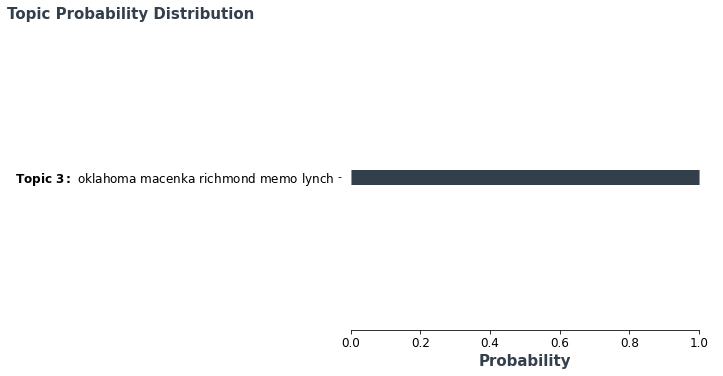

In [ ]:
#most likely topic based on frequency
model_0.visualize_distribution(probabilities_0[0])


In [ ]:
#macenka = spokesman for capitol police
#richmond = city with a high reported likelihood of further unrests
#lynch = Democratic Massachusetts Congressman Stephen Lynch spearheading part of the impeachment procedure
#memo = possibly referencing a memo of the FBI warning of security issues in regard to the inauguration ceremony and further unrest across the country

In [ ]:
#since the topics are still organised in quite a few clusters, we can force some categories together:
model_1 = BERTopic(nr_topics=50,stop_words="english")
topics_1, probabilities_1 = model_1.fit_transform(news_text)

In [ ]:
model_1.visualize_topics()

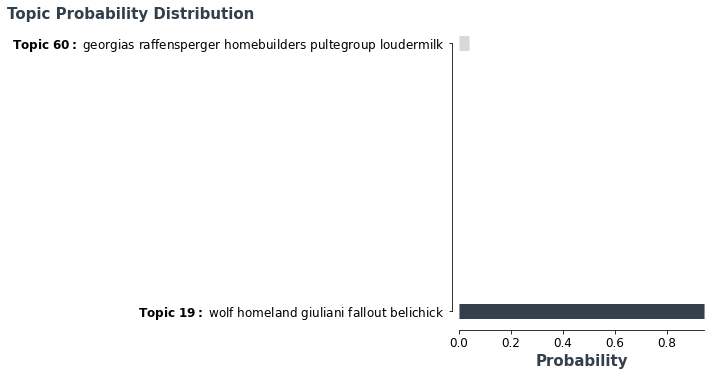

In [ ]:
model_1.visualize_distribution(probabilities[0])

In [ ]:
# Next step: natural language processing & sentiment analysis
# or: How has the media recption been in regard to the capitol storming?


In [ ]:
#first: lets look at a wordcloud of the news articles texts
from wordcloud import WordCloud, STOPWORDS

txt=news_df['Article'].str.cat(sep=', ')

stopwords = set(STOPWORDS)
stopwords.update(["br", "href","said"])
news_wordcloud = WordCloud(stopwords=stopwords, width = 800, height = 800, 
                background_color ='white',  
                collocations=False,
                min_font_size = 10).generate(txt)

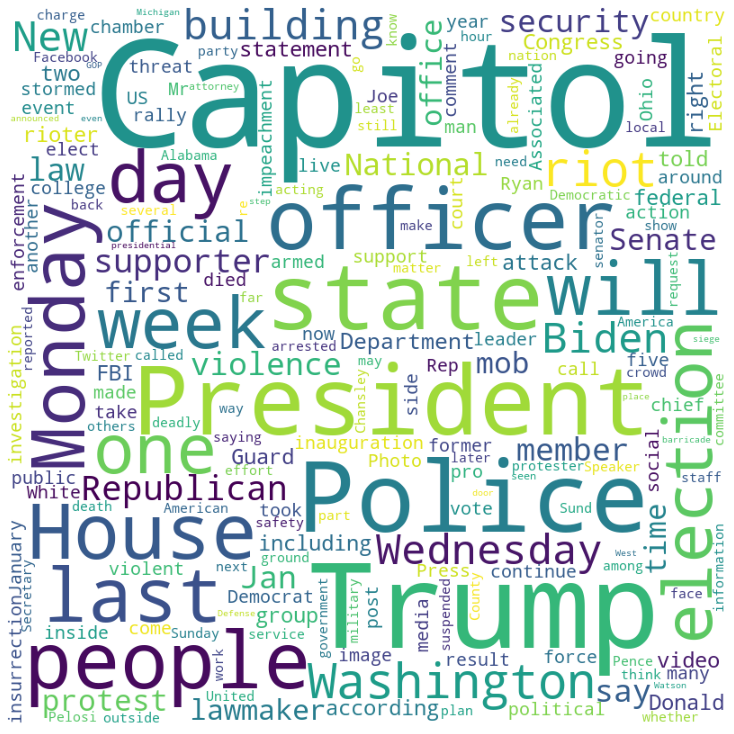

In [ ]:
plt.figure(figsize = (10, 10), facecolor = 'None') 
plt.imshow(news_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [ ]:
#actually a better visualisation of the topics than BERTopic
#next: sentiment analysis
news_df

Date  ...                                            Summary
0      31 mins ago  ...  OKLAHOMA CITY- With the violence at the US Cap...
1      50 mins ago  ...  That includes lawmakers who during a joint ses...
2       1 hour ago  ...  Chaos at the Capitol, as seen by allies and ad...
3       1 hour ago  ...  Hide Caption 5 of 24 Photos: Alabama rolls ove...
4       1 hour ago  ...  The GBI said Tuesday morning it was aware of t...
...            ...  ...                                                ...
1386  17 hours ago  ...  Lansing — Austin Chenge, a Republican candidat...
1387  17 hours ago  ...  Also: Best VPNsAmid stolen laptops, lost data ...
1388  17 hours ago  ...  Trump faces a single charge — "incitement of i...
1389  17 hours ago  ...  Sheryl Sandberg, Facebook COO testifies during...
1390  17 hours ago  ...  "Upholding good order and discipline demands t...

[1391 rows x 5 columns]

In [ ]:
text= news_df['Article']
text

0       OKLAHOMA CITY- With the violence at the US Cap...
1       PulteGroup, one of the nation’s largest homebu...
2       Chaos at the Capitol, as seen by allies and ad...
3       If your day doesn't start until you're up to s...
4       The GBI said Tuesday morning it was aware of t...
                              ...                        
1386    Lansing — Austin Chenge, a Republican candidat...
1387    When hostile actors penetrated the Capitol Bui...
1388    Impeachment pressure mounting, the House worke...
1389    Sheryl Sandberg, Facebook COO testifies during...
1390    "If accurate, it would be a disgraceful insult...
Name: Article, Length: 1391, dtype: object

In [ ]:
#pre-processing of text:

#convert to string
text = text.astype(str)

#lowercase everything

text = text.str.lower()

#remove punctuation
text = text.str.replace('[^\w\s]','')

#stopwords removal
stop =stopwords.words('english')
text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [ ]:
#stopwords removal

stop =stopwords.words('english')

text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [ ]:
text

0       oklahoma city violence us capitol last week qu...
1       pultegroup one nations largest homebuilders sa...
2       chaos capitol seen allies adversaries around w...
3       day doesnt start youre speed latest headlines ...
4       gbi said tuesday morning aware reports atlanta...
                              ...                        
1386    lansing austin chenge republican candidate mic...
1387    hostile actors penetrated capitol building jan...
1388    impeachment pressure mounting house worked swi...
1389    sheryl sandberg facebook coo testifies senate ...
1390    accurate would disgraceful insult vast majorit...
Name: Article, Length: 1391, dtype: object

In [ ]:
#stemming (removes -ing,-e, -es etc. and other word stemms)
st= PorterStemmer()
text = text.apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [ ]:
text

0       oklahoma citi violenc us capitol last week que...
1       pultegroup one nation largest homebuild said s...
2           chao capitol seen alli adversari around world
3       day doesnt start your speed latest headlin let...
4       gbi said tuesday morn awar report atlanta geor...
                              ...                        
1386    lans austin cheng republican candid michigan g...
1387    hostil actor penetr capitol build januari 6 ga...
1388    impeach pressur mount hous work swiftli monday...
1389    sheryl sandberg facebook coo testifi senat sel...
1390    accur would disgrac insult vast major servicem...
Name: Article, Length: 1391, dtype: object

In [ ]:
#lets calculate a sentiment score for each of the news articles

def senti(x):
    return TextBlob(x).sentiment  
 
sentiment_score['score']= text.apply(senti)
 

sentiment_score

0                (0.11385281385281387, 0.3492063492063492)
1                   (0.278452380952381, 0.506984126984127)
2                                               (0.0, 0.0)
3              (0.048804370232941666, 0.32137359994502857)
4              (-0.09999999999999999, 0.20476190476190473)
                               ...                        
1387           (0.012128914628914635, 0.37650436150436156)
1388             (0.12596758400329827, 0.4197175840032982)
1389            (0.08556818181818182, 0.42508838383838377)
1390            (-0.01728219696969698, 0.4121843434343435)
score    0         (0.11385281385281387, 0.349206349206...
Name: Article, Length: 1392, dtype: object

In [ ]:
#convert to df
score=pd.DataFrame(data=sentiment_score)
score

Article
0              (0.11385281385281387, 0.3492063492063492)
1                 (0.278452380952381, 0.506984126984127)
2                                             (0.0, 0.0)
3            (0.048804370232941666, 0.32137359994502857)
4            (-0.09999999999999999, 0.20476190476190473)
...                                                  ...
1387         (0.012128914628914635, 0.37650436150436156)
1388           (0.12596758400329827, 0.4197175840032982)
1389          (0.08556818181818182, 0.42508838383838377)
1390          (-0.01728219696969698, 0.4121843434343435)
score  0         (0.11385281385281387, 0.349206349206...

[1392 rows x 1 columns]

In [ ]:
#split into seperate columns
score_string = score.astype(str)
split_data = score_string["Article"].str.split(",")
data = split_data.to_list()
names = ["polarity", "subjectivity"]

new_df = pd.DataFrame(data, columns=names)

In [ ]:
#save dataframe
#score.to_excel('sentimentscores1.xlsx') 
#files.download('sentimentscores1.xlsx')

In [ ]:
uploaded=files.upload()

Saving senti.csv to senti.csv


In [ ]:
sentiment_score_final=pd.read_csv('senti.csv')

In [ ]:
sentiment_score_final

polarity  subjectivity
0     0.113853      0.349206
1     0.278452      0.506984
2     0.000000      0.000000
3     0.048804      0.321374
4    -0.100000      0.204762
...        ...           ...
1386  0.106107      0.389440
1387  0.012129      0.376504
1388  0.125968      0.419718
1389  0.085568      0.425088
1390 -0.017282      0.412184

[1391 rows x 2 columns]

In [ ]:
del news_df['Unnamed: 0']

In [ ]:
news_df

Date  ...                                            Summary
0      31 mins ago  ...  OKLAHOMA CITY- With the violence at the US Cap...
1      50 mins ago  ...  That includes lawmakers who during a joint ses...
2       1 hour ago  ...  Chaos at the Capitol, as seen by allies and ad...
3       1 hour ago  ...  Hide Caption 5 of 24 Photos: Alabama rolls ove...
4       1 hour ago  ...  The GBI said Tuesday morning it was aware of t...
...            ...  ...                                                ...
1386  17 hours ago  ...  Lansing — Austin Chenge, a Republican candidat...
1387  17 hours ago  ...  Also: Best VPNsAmid stolen laptops, lost data ...
1388  17 hours ago  ...  Trump faces a single charge — "incitement of i...
1389  17 hours ago  ...  Sheryl Sandberg, Facebook COO testifies during...
1390  17 hours ago  ...  "Upholding good order and discipline demands t...

[1391 rows x 5 columns]

In [ ]:
#combine sentiment with source table

In [ ]:
analysis=pd.concat([news_df,sentiment_score_final], axis=1)

In [ ]:
analysis

Date                         Media  ...  polarity subjectivity
0      31 mins ago                      kfor.com  ...  0.113853     0.349206
1      50 mins ago  Atlanta Journal Constitution  ...  0.278452     0.506984
2       1 hour ago                      CBS News  ...  0.000000     0.000000
3       1 hour ago                           CNN  ...  0.048804     0.321374
4       1 hour ago              11Alive.com WXIA  ... -0.100000     0.204762
...            ...                           ...  ...       ...          ...
1386  17 hours ago              The Detroit News  ...  0.106107     0.389440
1387  17 hours ago                         ZDNet  ...  0.012129     0.376504
1388  17 hours ago      FOX 29 News Philadelphia  ...  0.125968     0.419718
1389  17 hours ago                          CNBC  ...  0.085568     0.425088
1390  17 hours ago                      Politico  ... -0.017282     0.412184

[1391 rows x 7 columns]

In [ ]:
analysis=analysis.drop(columns=['Title','Article','Summary','Date'])

In [ ]:
#save dataframe
analysis.to_excel('analysis.xlsx') 
files.download('analysis.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
analysis

Media  polarity  subjectivity
0                         kfor.com  0.113853      0.349206
1     Atlanta Journal Constitution  0.278452      0.506984
2                         CBS News  0.000000      0.000000
3                              CNN  0.048804      0.321374
4                 11Alive.com WXIA -0.100000      0.204762
...                            ...       ...           ...
1386              The Detroit News  0.106107      0.389440
1387                         ZDNet  0.012129      0.376504
1388      FOX 29 News Philadelphia  0.125968      0.419718
1389                          CNBC  0.085568      0.425088
1390                      Politico -0.017282      0.412184

[1391 rows x 3 columns]

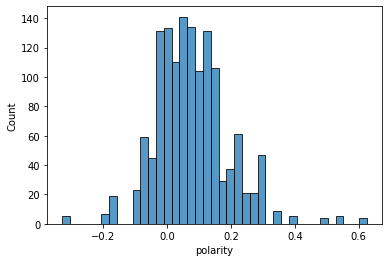

In [ ]:
# +1 = positive sentiment, -1 = negative sentiment
sns.histplot(data=analysis,x='polarity')

In [ ]:
#a surprising amount of sentiment is positive or at least not as negative as one would expect

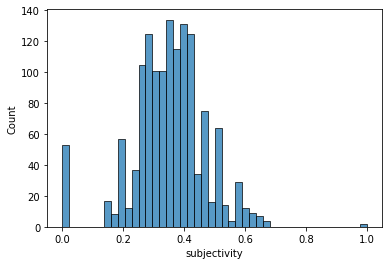

In [ ]:
sns.histplot(data=analysis,x='subjectivity')

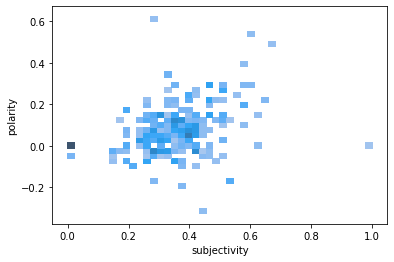

In [ ]:
#Does subjectivity influence polarity?
sns.histplot(analysis, y="polarity", x="subjectivity")

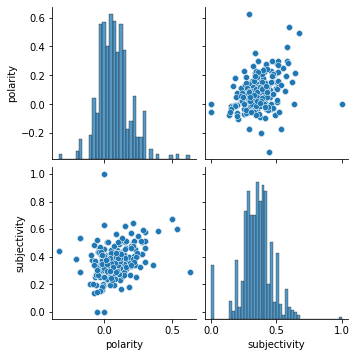

In [ ]:
sns.pairplot(analysis)

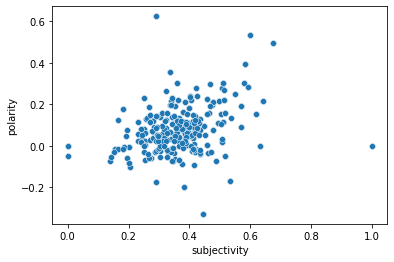

In [ ]:
#same plot in larger:
sns.scatterplot(data=analysis,y='polarity',x='subjectivity')

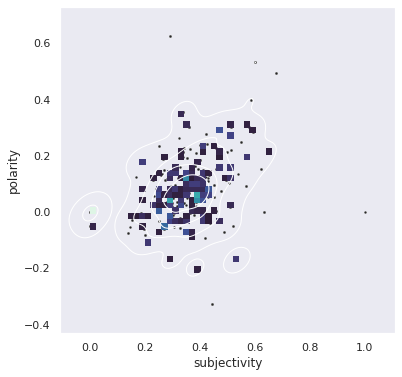

In [ ]:
sns.set_theme(style="dark")
x=analysis['subjectivity']
y=analysis['polarity']
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)


In [ ]:
#how much are those two correlated (pearson correlation) ? 0.36
from scipy.stats import pearsonr
corr, _ = pearsonr(analysis.polarity, analysis.subjectivity)
print('Pearsons correlation: %.3f' % corr)

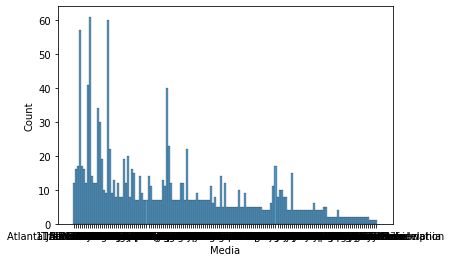

In [ ]:
sns.histplot(analysis, x='Media')

In [ ]:
#How many articles are published by which media outlets?
analysis['Media'].value_counts()

The New York Times           61
Reuters                      60
CNN                          57
NBC News                     41
Politico                     40
                             ..
wreg.com                      2
WFLA                          1
ZDNet                         1
FOX 29 News Philadelphia      1
KUOW News and Information     1
Name: Media, Length: 151, dtype: int64

In [ ]:
#mean polarity and subjectivity per media outlet:
analysis.groupby(['Media']).mean()

polarity  subjectivity
Media                                   
                  0.230877      0.443182
1011now           0.136508      0.261508
11Alive.com WXIA -0.051541      0.243207
ABC 12 News       0.058723      0.407965
ABC News         -0.081250      0.200000
...                    ...           ...
mySanAntonio.com  0.132407      0.321296
myfox8.com        0.018640      0.216588
nj.com            0.254776      0.492009
oregonlive.com   -0.035897      0.434295
wreg.com         -0.040909      0.265152

[151 rows x 2 columns]

In [ ]:
analysis['Media'].value_counts()

In [ ]:
#lets filter for publisher that have published more than 10 articles in our database
analysis['Media'].value_counts()[analysis['Media'].value_counts() > 10]

The New York Times              61
Reuters                         60
CNN                             57
NBC News                        41
Politico                        40
Axios                           34
Associated Press                30
Washington Post                 23
CNBC                            22
NPR                             22
Los Angeles Times               20
MarketWatch                     19
FOX31 Denver                    19
mlive.com                       17
11Alive.com WXIA                17
CBS News                        17
Atlanta Journal Constitution    16
Baltimore Sun                   16
KELOLAND.com                    16
Military.com                    15
Anchorage Daily News            15
The Guardian                    14
Stars and Stripes               14
WTOP                            14
                                14
Fox News                        13
KXAN.com                        13
WIS10                           12
WAVY.com            

In [ ]:
#adds count of publications in database to dataframe
analysis['Media_count']= analysis.Media.map(analysis.Media.value_counts())

In [ ]:
analysis

Media  polarity  subjectivity  Media_count
0                         kfor.com  0.113853      0.349206           12
1     Atlanta Journal Constitution  0.278452      0.506984           16
2                         CBS News  0.000000      0.000000           17
3                              CNN  0.048804      0.321374           57
4                 11Alive.com WXIA -0.100000      0.204762           17
...                            ...       ...           ...          ...
1386              The Detroit News  0.106107      0.389440           12
1387                         ZDNet  0.012129      0.376504            1
1388      FOX 29 News Philadelphia  0.125968      0.419718            1
1389                          CNBC  0.085568      0.425088           22
1390                      Politico -0.017282      0.412184           40

[1391 rows x 4 columns]

In [ ]:
#top_news is a table where only puplications with over 10 articles are listed
top_news=analysis.loc[analysis['Media_count'] > 10]

In [ ]:
top_news_mean=top_news.groupby(['Media']).mean()

In [ ]:
top_news_mean.sort_values(by='subjectivity', ascending=False, inplace=True)

In [ ]:
top_news_mean

polarity  subjectivity  Media_count
Media                                                            
KCRG                         -0.171429      0.534127           12
WGN-TV                       -0.068032      0.483171           12
KELOLAND.com                  0.298571      0.466905           16
Atlanta Journal Constitution  0.265982      0.465952           16
Associated Press              0.104885      0.462377           30
TwinCities.com-Pioneer Press  0.072732      0.460027           11
mlive.com                     0.137088      0.458960           17
The Detroit News              0.108193      0.443292           12
                              0.230877      0.443182           14
Axios                         0.033957      0.414308           34
The New York Times            0.072117      0.403138           61
Politico                      0.006014      0.397532           40
Washington Post               0.051372      0.393989           23
WKOW                          0.112235      0.389208           11
Los Angeles Times             0.123034      0.375613           20
Financial Times               0.125000      0.375000           12
kfor.com                      0.113145      0.370387           12
Reuters                       0.153599      0.360785           60
KTLA                          0.096495      0.356850           12
Fox News                      0.128987      0.350183           13
KXAN.com                      0.090878      0.348852           13
NBC News                      0.104072      0.348654           41
The Guardian                  0.146982      0.340647           14
WAVY.com                      0.013484      0.340014           12
NPR                           0.105213      0.337396           22
CNN                           0.047975      0.331733           57
NBC2 News                     0.028261      0.327902           11
U.S. News & World Report      0.018547      0.326258           11
CNBC                          0.084449      0.318155           22
WIS10                         0.138776      0.303061           12
WTOP                          0.103313      0.302484           14
FOX31 Denver                  0.110626      0.295547           19
KFSN-TV                      -0.021741      0.292314           12
MarketWatch                   0.033487      0.289762           19
Military.com                  0.057115      0.284459           15
Stars and Stripes            -0.056262      0.256280           14
Anchorage Daily News          0.060714      0.252778           15
11Alive.com WXIA             -0.051541      0.243207           17
FOX 5 DC                      0.106140      0.238438           12
Baltimore Sun                 0.123810      0.168717           16
CBS News                     -0.008825      0.100039           17

In [ ]:
#lets try another sentiment analysis called VADER

In [ ]:
#prep another dataframe
v=pd.DataFrame(data=text)
media=news_df['Media']
vader=pd.concat([media,v], axis=1)

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer= SentimentIntensityAnalyzer()

In [ ]:
sentence='Trump is a very bad man'
analyzer.polarity_scores(sentence)

{'compound': -0.5849, 'neg': 0.431, 'neu': 0.569, 'pos': 0.0}

In [ ]:
vader['compound'] = [analyzer.polarity_scores(v)['compound'] for v in vader['Article']]
vader['neg'] = [analyzer.polarity_scores(v)['neg'] for v in vader['Article']]
vader['neu'] = [analyzer.polarity_scores(v)['neu'] for v in vader['Article']]
vader['pos'] = [analyzer.polarity_scores(v)['pos'] for v in vader['Article']]

In [ ]:
vader

Media  ...    pos
0                         kfor.com  ...  0.079
1     Atlanta Journal Constitution  ...  0.044
2                         CBS News  ...  0.000
3                              CNN  ...  0.061
4                 11Alive.com WXIA  ...  0.085
...                            ...  ...    ...
1386              The Detroit News  ...  0.094
1387                         ZDNet  ...  0.090
1388      FOX 29 News Philadelphia  ...  0.057
1389                          CNBC  ...  0.075
1390                      Politico  ...  0.081

[1391 rows x 6 columns]

In [ ]:
#save dataframe
vader.to_excel('vader.xlsx') 
files.download('vader.xlsx')
vader=files.upload()
vader=pd.read_excel('vader.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
vader=files.upload()


Saving vader.xlsx to vader.xlsx


In [ ]:
vader=pd.read_excel('vader.xlsx')

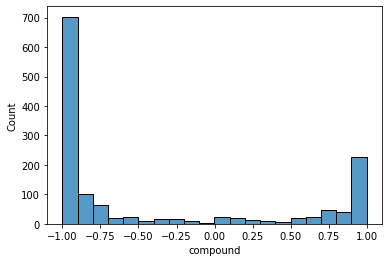

In [ ]:
sns.histplot(data=vader,x='compound',bins=20)

In [ ]:
#a lot more negative sentiment detected, as is to be expected

In [ ]:
vader.columns

Index(['Unnamed: 0', 'Media', 'Article', 'compound', 'neg', 'neu', 'pos'], dtype='object')

In [ ]:
vader['Media_count']= vader.Media.map(vader.Media.value_counts())

In [ ]:
##############################################
#       select media that have >12 publications
#       and find mean sentiment of published articles
#       or: how much does the media publisher influence 
#       the article sentiment?
##############################################



In [ ]:
top_vader=vader.loc[vader['Media_count'] > 12 ]
top_vader=top_vader.groupby(['Media'],as_index=False).mean()
top_vader.sort_values(by='compound', ascending=False, inplace=True)
top_vader

Media   Unnamed: 0  ...       pos  Media_count
11                  KELOLAND.com   506.750000  ...  0.132000         16.0
9                   FOX31 Denver   439.842105  ...  0.092421         19.0
1           Anchorage Daily News   535.066667  ...  0.075000         15.0
12                      KXAN.com   609.692308  ...  0.107615         13.0
0               11Alive.com WXIA   488.647059  ...  0.074706         17.0
17                           NPR   611.772727  ...  0.130273         22.0
21                  The Guardian   591.428571  ...  0.074000         14.0
13             Los Angeles Times   610.850000  ...  0.088100         20.0
2               Associated Press   366.833333  ...  0.081133         30.0
18                      Politico   667.775000  ...  0.069025         40.0
23                          WTOP   582.428571  ...  0.075429         14.0
15                  Military.com  1059.000000  ...  0.069733         15.0
14                   MarketWatch   640.421053  ...  0.079211         19.0
5                  Baltimore Sun   508.875000  ...  0.043000         16.0
16                      NBC News   655.926829  ...  0.061659         41.0
3   Atlanta Journal Constitution   499.875000  ...  0.054250         16.0
19                       Reuters   624.233333  ...  0.073483         60.0
22            The New York Times   714.032787  ...  0.054721         61.0
8                            CNN   508.701754  ...  0.069316         57.0
24               Washington Post   702.782609  ...  0.058870         23.0
6                       CBS News   482.235294  ...  0.017647         17.0
4                          Axios   567.500000  ...  0.051765         34.0
7                           CNBC   878.181818  ...  0.063955         22.0
10                      Fox News   638.538462  ...  0.023923         13.0
25                     mlive.com   997.705882  ...  0.069412         17.0
20             Stars and Stripes   489.214286  ...  0.053714         14.0

[26 rows x 7 columns]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

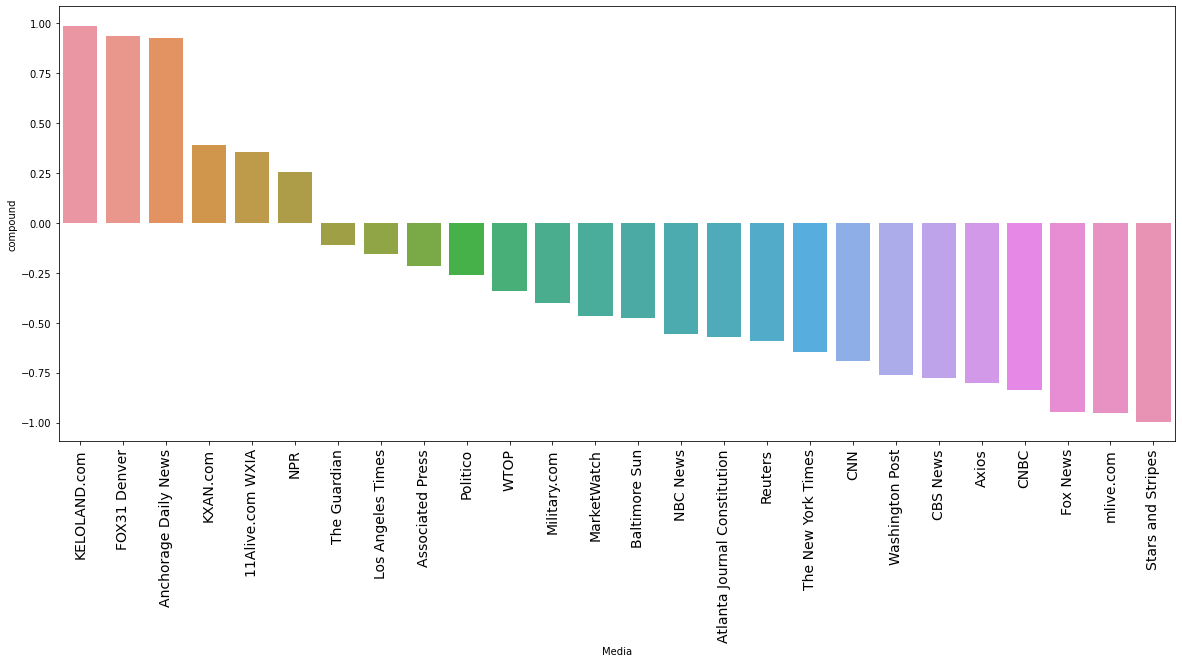

In [ ]:
 plt.figure(figsize=(20,8))
 plt.xticks(fontsize=14, rotation=90)
 plt.ylabel("sentiment")
 plt.xlabel("Publication")
 sns.barplot(x="Media", y="compound", data=top_vader)
 plt.savefig("media.png")
 files.download("media.png") 

Most negative sentiment is from the US armed forces Stars & Stripes (on par with statement of Joint chief of staffs statement (highest level of military https://www.defense.gov/Explore/News/Article/Article/2470780/joint-chiefs-stress-service-members-commitment-to-constitution/)
surprisingly, Fox news is also among the negative sentiment. Whereas the Denver subsidiary of Fox news is among the most positive.

In [ ]:
vader_group=vader.groupby(['Media'],as_index=False).mean()
vader_group.sort_values(by='compound', ascending=False, inplace=True)


In [ ]:
vader_group

Media   Unnamed: 0  ...       pos  Media_count
55                        KTRK-TV   799.400000  ...  0.130000          5.0
26                           ESPN   822.400000  ...  0.134000          5.0
73                   NBC10 Boston   944.500000  ...  0.133000          4.0
46                   KELOLAND.com   506.750000  ...  0.132000         16.0
126                          WOWT   926.500000  ...  0.078000          4.0
..                            ...          ...  ...       ...          ...
92                 Slate Magazine   697.166667  ...  0.069000          6.0
106                   Vanity Fair  1236.500000  ...  0.074000          2.0
102  TwinCities.com-Pioneer Press   726.181818  ...  0.046636         11.0
107                           Vox   964.500000  ...  0.058000          4.0
49                           KPBS   952.500000  ...  0.066000          4.0

[150 rows x 7 columns]

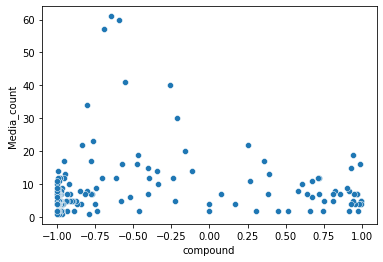

In [ ]:
#Whats the relationship between size of media (e.g. NY Times vs small local newspaper) and the news article sentiment?
sns.scatterplot(data=vader_group,x='compound',y='Media_count')

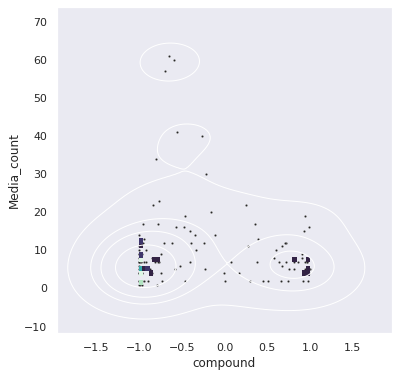

In [ ]:
sns.set_theme(style="dark")
x=vader_group['compound']
y=vader_group['Media_count']
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)


In [ ]:
#split vader into positive and negative sentiment:

In [ ]:
pos_vader=vader.loc[vader['compound'] > 0 ]
neg_vader=vader.loc[vader['compound'] < 0 ]

In [ ]:
neg_vader


Media  ... Media_count
1     Atlanta Journal Constitution  ...        16.0
2                         CBS News  ...        17.0
3                              CNN  ...        57.0
5                    Baltimore Sun  ...        16.0
6                             KCRG  ...        12.0
...                            ...  ...         ...
1384                          WFLA  ...         1.0
1385     KUOW News and Information  ...         1.0
1387                         ZDNet  ...         1.0
1388      FOX 29 News Philadelphia  ...         1.0
1390                      Politico  ...        40.0

[965 rows x 7 columns]

In [ ]:
pos_vader

Media  ... Media_count
0             kfor.com  ...        12.0
4     11Alive.com WXIA  ...        17.0
14    Associated Press  ...        30.0
16            kfor.com  ...        12.0
20    11Alive.com WXIA  ...        17.0
...                ...  ...         ...
1371        The Nation  ...         2.0
1375   Morningstar.com  ...         2.0
1377           WSLS 10  ...         2.0
1386  The Detroit News  ...        12.0
1389              CNBC  ...        22.0

[420 rows x 7 columns]

In [ ]:
#lets see how the language differs in each of these:

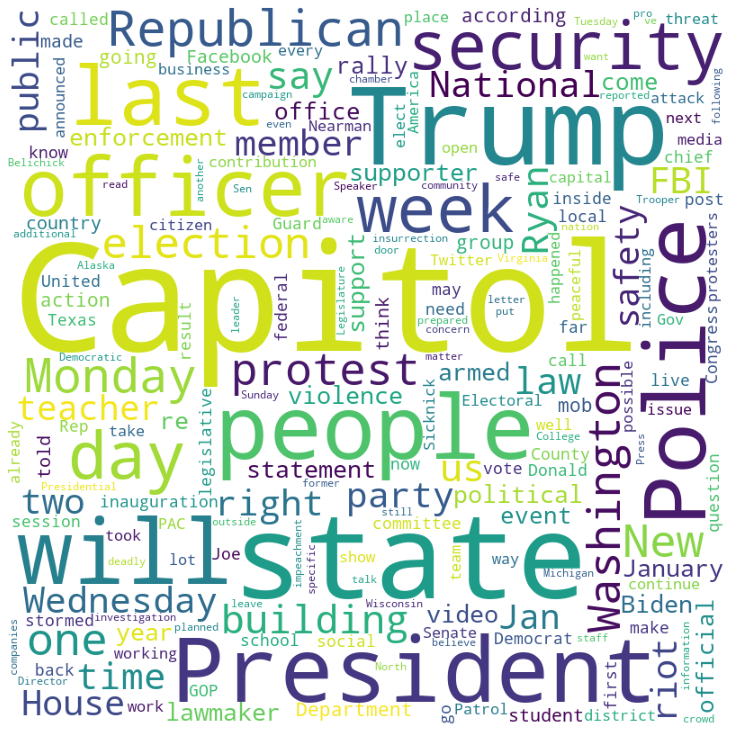

In [ ]:
from wordcloud import WordCloud, STOPWORDS
#positive wordcloud
txt_1=pos_vader['Article'].str.cat(sep=', ')

stopwords = set(STOPWORDS)
stopwords.update(["br", "href","said"])
pos_wordcloud = WordCloud(stopwords=stopwords, width = 800, height = 800, 
                background_color ='white',  
                collocations=False,
                min_font_size = 10).generate(txt_1)


plt.figure(figsize = (10, 10), facecolor = 'None') 
plt.imshow(pos_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

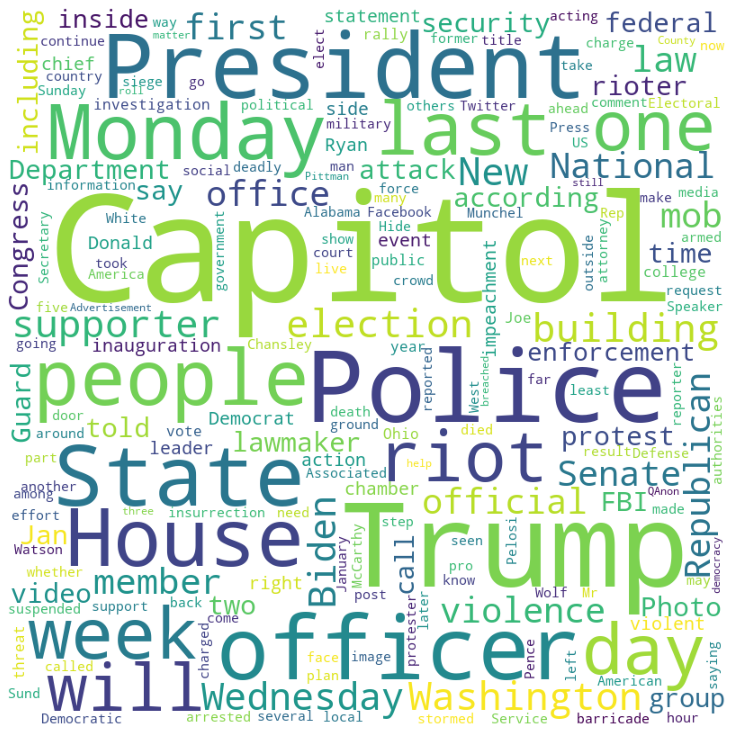

In [ ]:
#negative wordcloud

txt_2=neg_vader['Article'].str.cat(sep=', ')

stopwords = set(STOPWORDS)
stopwords.update(["br", "href","said"])
pos_wordcloud = WordCloud(stopwords=stopwords, width = 800, height = 800, 
                background_color ='white',  
                collocations=False,
                min_font_size = 10).generate(txt_2)


plt.figure(figsize = (10, 10), facecolor = 'None') 
plt.imshow(pos_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [ ]:

#
#NEXT: scraping of twitter feed regaring 'capitol' in last 7 days (default by tweepy API)
#       and comparison of vader sentiment analysis between public sphere and news
#
# 

In [ ]:
# 1. create twitter developer account
# 2. receive authentications
# 3. scrape information (tweets regarding 'capitol' in the last 7 days)
# 4. analysis

consumer_key = "xxx"
consumer_secret = "xxx"
access_token = "xxx"
access_token_secret = "xxx"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [ ]:
#look for 50k tweets with query capitol
text_query = 'Capitol'
count = 50000

 # Creation of query method using parameters
tweets = tweepy.Cursor(api.search,q=text_query).items(count)
 
 # Pulling information from tweets iterable object
tweets_list = [[tweet.created_at, tweet.id, tweet.text] for tweet in tweets]
 
 # Creation of dataframe from tweets list
 # Add or remove columns as you remove tweet information
tweets_df = pd.DataFrame(tweets_list)
 


In [ ]:
#save dataframe
tweets_df.to_excel('twitter50k.xlsx') 
files.download('twitter50k.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
upload=files.upload()

Saving tweets50k.xlsx to tweets50k (1).xlsx


In [ ]:
txt_twt=pd.read_excel('tweets50k (1).xlsx')

In [ ]:
del txt_twt['Unnamed: 0']

In [ ]:
txt_twt.rename(columns={ txt_twt.columns[2]: "text" }, inplace = True)

In [ ]:
txt_twt

0  ...                                               text
0     2021-01-14 17:29:40  ...  RT @postcards4USA: Thank the custodial staff t...
1     2021-01-14 17:29:39  ...  RT @donwinslow: .@laurenboebert should be ques...
2     2021-01-14 17:29:39  ...  RT @WajahatAli: Compare Republican outrage to ...
3     2021-01-14 17:29:39  ...  RT @StarTribune: A Minnesota National Guard so...
4     2021-01-14 17:29:39  ...  RT @m_mendozaferrer: Excellent reporting by @S...
...                   ...  ...                                                ...
49995 2021-01-14 16:51:18  ...  RT @karlogan_: He looks like he was at the Cap...
49996 2021-01-14 16:51:18  ...                            https://t.co/tTnaRLcJ1I
49997 2021-01-14 16:51:18  ...  RT @abby0mal: if adults can still be employed ...
49998 2021-01-14 16:51:18  ...  RT @FBIWFO: Thank you for your tips! The #FBI ...
49999 2021-01-14 16:51:18  ...  RT @HarrisonKrank: FBI arrests fur-wearing NYC...

[50000 rows x 3 columns]

In [ ]:
text_twitter= txt_twt['text']
text_twitter

0        RT @postcards4USA: Thank the custodial staff t...
1        RT @donwinslow: .@laurenboebert should be ques...
2        RT @WajahatAli: Compare Republican outrage to ...
3        RT @StarTribune: A Minnesota National Guard so...
4        RT @m_mendozaferrer: Excellent reporting by @S...
                               ...                        
49995    RT @karlogan_: He looks like he was at the Cap...
49996                              https://t.co/tTnaRLcJ1I
49997    RT @abby0mal: if adults can still be employed ...
49998    RT @FBIWFO: Thank you for your tips! The #FBI ...
49999    RT @HarrisonKrank: FBI arrests fur-wearing NYC...
Name: text, Length: 50000, dtype: object

In [ ]:
from TextPreProcessor import TextPreProcessor

ModuleNotFoundError: ignored

In [ ]:
#stemming (removes -ing,-e, -es etc. and other word stemms) (only necessary for sentiment analysis, not topic modelling)
st= PorterStemmer()
text_twitter= text_twitter.apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [ ]:
text_twitter

['rt postcards4usa thank the custodi staff the capitol for clean up after the riot afscm local 626 ford hou offic build 2nd s',
 'rt donwinslow laurenboebert should be question by the fbi immedi thi tweet along with other disturb action she ha take',
 'rt wajahatali compar republican outrag to kaepernick kneel dure the anthem to protest polic brutal against black live vs v',
 'rt startribun a minnesota nation guard soldier who critic the guard for a tepid public respon to last week insurrect at th',
 'rt m_mendozaferr excel report by schwartzbcnb re dark fund women for america first whose product vendor for 16 wa',
 'rt bleacherreport the pga of america ha vote to remov it 2022 championship event from trump nation golf club after a protrump mob',
 'rt kylegriffin1 the man photograph hold a conf flag insid the us capitol dure the riot ha been arrest in delawar tw',
 'rt tpm no one took us seriou black cop warn about racist capitol polic offic for year  ',
 'rt repsherril thi is unusu fo

In [ ]:
#prep another dataframe
vader_twitter=pd.DataFrame(data=text_twitter)


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer= SentimentIntensityAnalyzer()

In [ ]:
vader_twitter

0
0      rt postcards4usa thank the custodi staff the c...
1      rt donwinslow laurenboebert should be question...
2      rt wajahatali compar republican outrag to kaep...
3      rt startribun a minnesota nation guard soldier...
4      rt m_mendozaferr excel report by schwartzbcnb ...
...                                                  ...
49995  rt karlogan_ he look like he wa at the capitol...
49996                                                   
49997  rt abby0m if adult can still be employ after s...
49998  rt fbiwfo thank you for your tip the fbi amp o...
49999  rt harrisonkrank fbi arrest furwear nyc man on...

[50000 rows x 1 columns]

In [ ]:
vader_twitter['compound'] = [analyzer.polarity_scores(v)['compound'] for v in vader_twitter['text']]
vader_twitter['neg'] = [analyzer.polarity_scores(v)['neg'] for v in vader_twitter['text']]
vader_twitter['neu'] = [analyzer.polarity_scores(v)['neu'] for v in vader_twitter['text']]
vader_twitter['pos'] = [analyzer.polarity_scores(v)['pos'] for v in vader_twitter['text']]

In [ ]:
vader_twitter.to_excel('vader_twitter.xlsx') 
files.download('vader_twitter.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

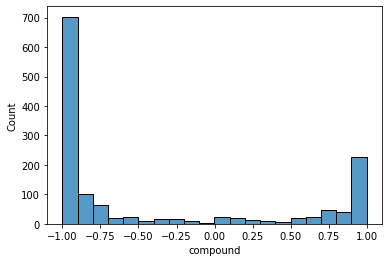

In [ ]:
#news sentiment
sns.histplot(data=vader,x='compound',bins=20).ax.set_title('Google News sentiment analysis')

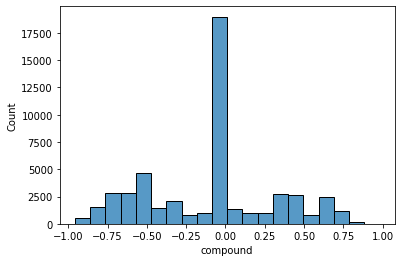

In [ ]:
#twitter sentiment
sns.histplot(data=vader_twitter,x='compound',bins=20)

In [ ]:
#conclusions: news tend to be a lot more negative regarding the sentiment whereas tweets are  more likely to be all across the board.
# large spike of neutral sentiment might be explained by the number of bots on twitter

In [ ]:
text_twitter

['rt postcards4usa thank the custodial staff the capitol for cleaning up after the riot\nafscme local 626\nford house office building\n2nd s',
 'rt donwinslow laurenboebert should be questioned by the fbi immediately this tweet  along with other disturbing actions she has take',
 'rt wajahatali compare republican outrage to kaepernick kneeling during the anthem to protest police brutality against black lives\n\nvs\n\nv',
 'rt startribune a minnesota national guard soldier who criticized the guard for a tepid public response to last weeks insurrection at th',
 'rt m_mendozaferrer excellent reporting by schwartzbcnb re  dark  funding women for america first\nwhose production vendor for 16 was',
 'rt bleacherreport the pga of america has voted to remove its 2022 championship event from trump national golf club after a protrump mob',
 'rt kylegriffin1 the man photographed holding a confederate flag inside the us capitol during the riot has been arrested in delaware tw',
 'rt tpm no one too

In [ ]:
from bertopic import BERTopic
from tqdm import tqdm_notebook

model = BERTopic(stop_words="english",nr_topics=50)
topics, probabilities = model.fit_transform(text_twitter)


In [ ]:
#-1 one is topics that couldnt be represented accurately
model.get_topic_freq().head()

Topic  Count
0     -1   9469
1     28   2091
2     19   1970
3      1   1903
4     52   1363

In [ ]:
model.get_topic(28)


[('abby0mal', 0.27577641614775666),
 ('storming', 0.2586575174658822),
 ('grandparents', 0.026169478500941236),
 ('travisallen02', 0.025672063784558875),
 ('rt', 0.011668646801011553),
 ('asia', 0.0008763852101990773),
 ('cultlike', 0.0008763852101990773),
 ('hoods', 0.0008412951965159822),
 ('fearing', 0.0008412951965159822),
 ('fled', 0.000797087007527147)]

In [ ]:
model.get_topic(19)


[('delaware', 0.21463340452464555),
 ('confederate', 0.1685377604205873),
 ('flag', 0.16816356262698628),
 ('kylegriffin1', 0.16089064209161003),
 ('arrested', 0.144398584433228),
 ('mikedelmoro', 0.06472009338542876),
 ('capitol', 0.03429733862112511),
 ('jbillinson', 0.01615888164494886),
 ('politvidchannel', 0.013988567379399207),
 ('trump', 0.013790952784128938)]

In [ ]:
model.get_topic(1)


[('18airbornecorps', 0.22234128340212125),
 ('singlehandedly', 0.2220290351299885),
 ('hailed', 0.22177899207990717),
 ('repnancymace', 0.026249450478212942),
 ('infantryman', 0.024651713082404474),
 ('danlamothe', 0.021972625289181234),
 ('amp', 0.016922034056707506),
 ('indulges', 0.01492348629186063),
 ('incredibly', 0.014841486665607839),
 ('esotericcd', 0.014636496170863314)]

In [ ]:
model.get_topic(52)


[('drericding', 0.19251309027384159),
 ('breakingtheyve', 0.19249162034354353),
 ('extinguisher', 0.16621156853130734),
 ('siege', 0.1524110079523697),
 ('likeasummerbres', 0.06021512268764516),
 ('custodial', 0.02819391207099679),
 ('camp', 0.02546150226135122),
 ('megy12', 0.021577738650858956),
 ('auschwitz', 0.021129266251904456),
 ('newport', 0.011611919143717444)]

800 0.084


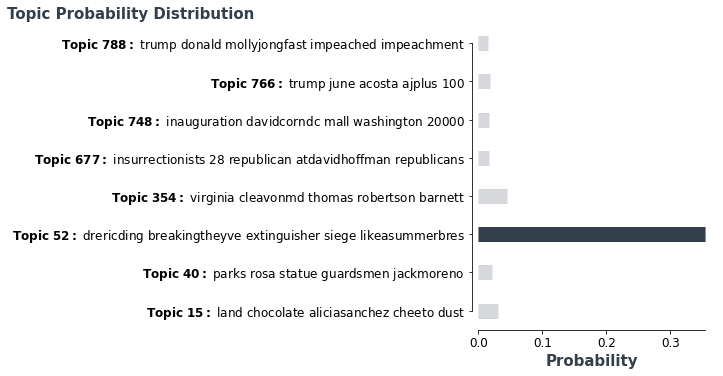

In [ ]:
model.visualize_distribution(probabilities[0])

In [ ]:
model.visualize_topics()

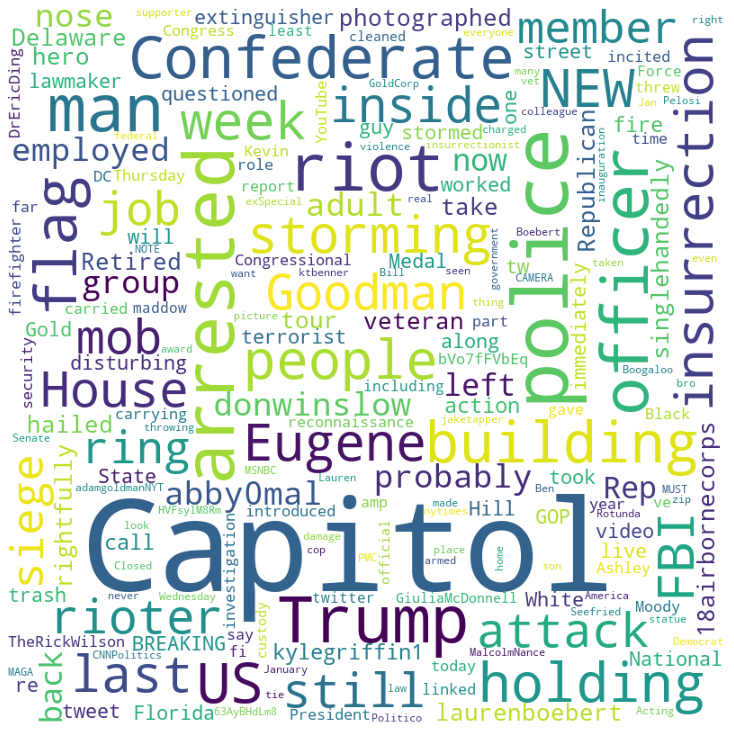

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
#twitter wordcloud

from wordcloud import WordCloud, STOPWORDS

txt_3=txt_twt['text'].str.cat(sep=', ')

stopwords = set(STOPWORDS)
stopwords.update(["br", "href","said",'rt','https','day','co'])
pos_wordcloud = WordCloud(stopwords=stopwords, width = 800, height = 800, 
                background_color ='white',  
                collocations=False,
                min_font_size = 10).generate(txt_3)


plt.figure(figsize = (10, 10), facecolor = 'None') 
plt.imshow(pos_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()


In [ ]:
#sources
#https://medium.com/analytics-vidhya/googlenews-api-live-news-from-google-news-using-python-b50272f0a8f0
#https://towardsdatascience.com/interactive-topic-modeling-with-bertopic-1ea55e7d73d8
#https://data-science-blog.com/blog/2018/11/04/sentiment-analysis-using-python/
#https://medium.com/swlh/simple-sentiment-analysis-for-nlp-beginners-and-everyone-else-using-vader-and-textblob-728da3dbe33d
#https://towardsdatascience.com/how-to-scrape-tweets-from-twitter-59287e20f0f1
